Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing Dataset

In [2]:
dataInfo = pd.read_csv("iris.csv")

Viewing the DataFrame

In [3]:
dataInfo

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Printing Head and Tail Data

In [4]:
dataInfo.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataInfo.tail()

,sepal length,sepal width,petal length,petal width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Printing info and checking missing values

In [6]:
dataInfo.isnull()

,sepal length,sepal width,petal length,petal width,class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [7]:
dataInfo.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

Summary Statistics

In [8]:
dataInfo.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Visualizations

count of class feature 

In [9]:
dataInfo['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

Visualizing the whole dataset using pairplot

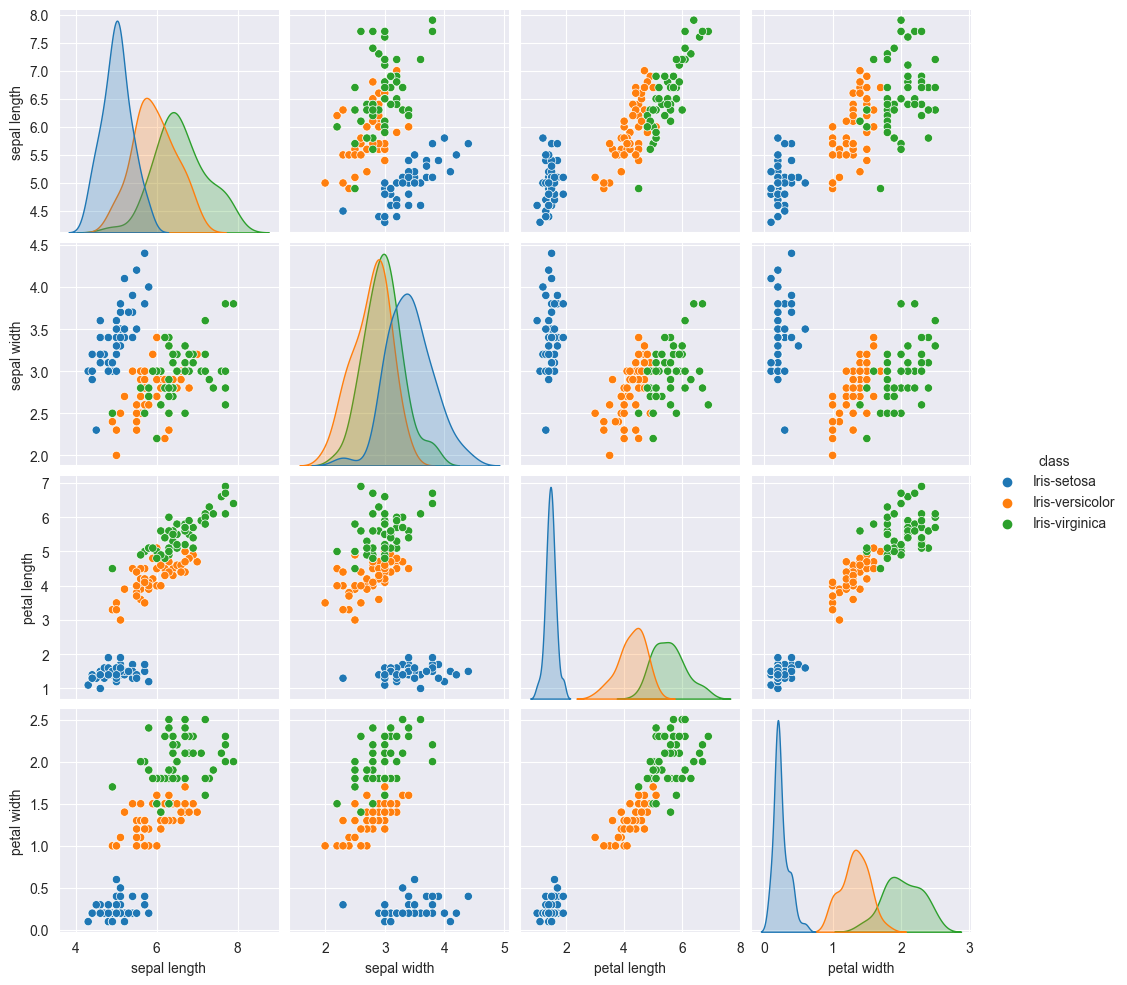

In [10]:
sns.pairplot(dataInfo, hue='class')

Heatmap - correlation between different features

C:\Users\polis\AppData\Local\Temp\ipykernel_7936\1520052519.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataInfo.corr(), annot = True, fmt='.1f')


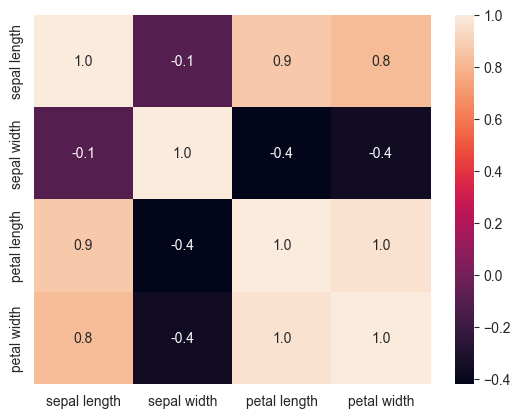

In [11]:
sns.heatmap(dataInfo.corr(), annot = True, fmt='.1f')
plt.show()

Boxplot - individual feeature distribution

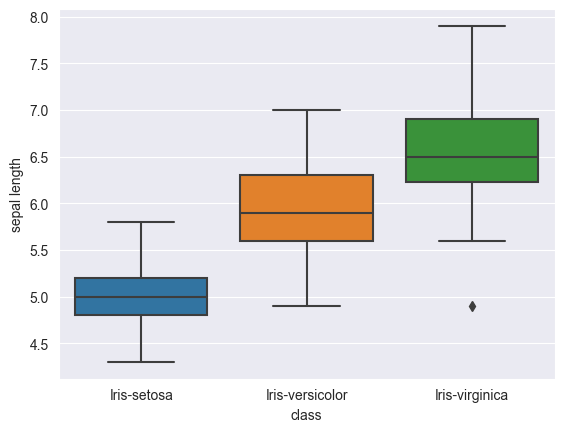

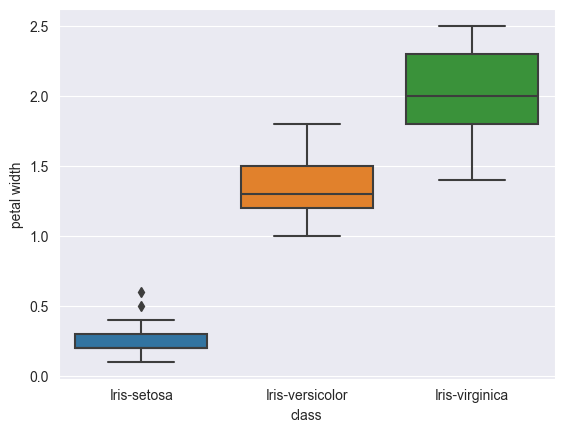

In [12]:
sns.boxplot(x="class", y='sepal length', data=dataInfo)
plt.show()
sns.boxplot(x="class", y='petal width', data=dataInfo)
plt.show()

Splitting the dataset

In [13]:
x = dataInfo.iloc[:,:4] # printing all rows but only independet variables
y = dataInfo.iloc[:,4] # printing all rows but only dependent variable

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

Shapes

In [15]:
x_train.shape

(112, 4)

In [16]:
x_test.shape

(38, 4)

In [17]:
y_train.shape

(112,)

In [18]:
y_test.shape

(38,)

Model Building - LogisticRegression

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

Trainig the model

In [20]:
model.fit(x_train,y_train)

LogisticRegression()

Predicting result

In [21]:
predicted_result = model.predict(x_test)

In [22]:
predicted_result

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

Calculation metrics

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [24]:
confusion_matrix(y_test,predicted_result)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [25]:
accuracy = accuracy_score(y_test,predicted_result)*100
print(round(accuracy, 3))

97.368


Support Vector Machine

In [26]:
from sklearn.svm import SVC
svmResult = SVC()
svmResult.fit(x_train,y_train)

SVC()

In [27]:
svmPredictedResult = svmResult.predict(x_test)

In [28]:
svmPredictedResult

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [29]:
round(accuracy_score(y_test,svmPredictedResult)*100, 3)


97.368